In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Import Dataset

In [3]:
data = pd.read_excel('E:\\Python with Data Science\\Self Projects\\CCPP.xlsx')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


There are no missing values, so preprocessing is skipped

# Define x and y

In [4]:
# PE is the Dependent Variable and rest are Independent Variable

x = data.drop(['PE'], axis = 1).values
y = data['PE'].values

# Split the dataset in training set and test set

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Train the model on training set

In [12]:
from sklearn.linear_model import LinearRegression
lr = KNeighborsRegressor(n_jobs=1)
lr.fit(x_train, y_train)

LinearRegression(n_jobs=1)

In [14]:
'''
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 10)

knnr.fit(x_train, y_train)
'''

'\nfrom sklearn.neighbors import KNeighborsRegressor\nknnr = KNeighborsRegressor(n_neighbors = 10)\n\nknnr.fit(x_train, y_train)\n'

# Predict the test set results

To predict the test set results and check if acurate results are obtained

In [7]:
y_pred = lr.predict(x_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

Comparing the predicted values of x_test to the original dataset

In [8]:
# The prediction value of row_1 (467.348) is close to the value of dependent variable (PE) -> 463.26
# SO, we can state that model is nearly accurate

row_1 = lr.predict([[14.96, 41.76, 1024.07, 73.17]])
row_1

array([467.34820092])

# Evaluate the model

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9304112159477682

# Plot the results

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'Actual v/s Predicted')

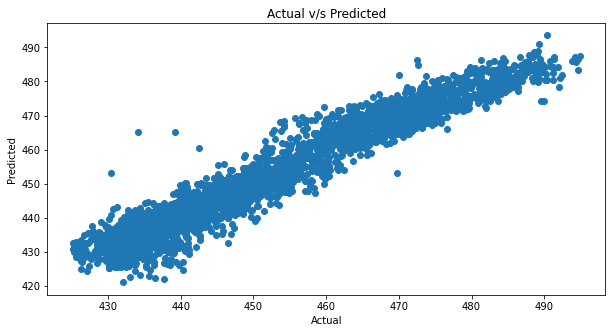

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')

# Predict values

In [11]:
y_pred_df = pd.DataFrame({'Actual_Values':y_test, 'Predicted_Values':y_pred, 'Difference':y_test-y_pred})
y_pred_df.head(10)

,Actual_Values,Predicted_Values,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396


There is not much difference between the actual and predicted values.
Most of the predicted values are close to the actual values, which shows that pur model is a strong model